In [64]:
import pandas as pd
import warnings
from sklearn.utils import ConvergenceWarning
import numpy as np
import requests
import re
import os
import glob
import csv
import numpy as np
import scipy, scipy.stats
import sklearn
from sklearn import *
lm=linear_model.LinearRegression()
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import math
%matplotlib inline
from numpy import genfromtxt
from sklearn import datasets, linear_model
from sklearn.ensemble import RandomForestRegressor
#from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from  sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

In [5]:
def create_dumies(df):
    dummies = pd.get_dummies(df['flag_fthb']).rename(columns=lambda x: 'flag_fthb_' + str(x)) 
    train_df=pd.concat([df, dummies], axis=1) 
    dummies1 = pd.get_dummies(df['occpy_sts']).rename(columns=lambda x: 'occpy_sts_' + str(x)) 
    train_df=pd.concat([train_df, dummies1], axis=1) 
    dummies2 = pd.get_dummies(df['channel']).rename(columns=lambda x: 'channel_' + str(x)) 
    train_df=pd.concat([train_df, dummies2], axis=1) 
    dummies3 = pd.get_dummies(df['ppmt_pnlty']).rename(columns=lambda x: 'ppmt_pnlty_' + str(x)) 
    train_df=pd.concat([train_df, dummies3], axis=1) 
    dummies4 = pd.get_dummies(df['prop_type']).rename(columns=lambda x: 'prop_type_' + str(x)) 
    train_df=pd.concat([train_df, dummies4], axis=1) 
    dummies5 = pd.get_dummies(df['loan_purpose']).rename(columns=lambda x: 'loan_purpose_' + str(x)) 
    train_df=pd.concat([train_df, dummies5], axis=1) 
    dummies6 = pd.get_dummies(df['seller_name']).rename(columns=lambda x: 'seller_name_' + str(x)) 
    train_df=pd.concat([train_df, dummies6], axis=1) 
    train_df['flag_sc']=train_df['flag_sc'].map({'Y':1,'N':0}) 
    return train_df

In [6]:
def changedatatype(df):
    #Change the data types for all column
    df[['fico','cd_msa','mi_pct','cnt_borr','cnt_units','cltv','dti','orig_upb','ltv','zipcode','orig_loan_term']] = df[['fico','cd_msa','mi_pct','cnt_borr','cnt_units','cltv','dti','orig_upb','ltv','zipcode','orig_loan_term']].astype('int64')
    df[['flag_sc','servicer_name','seller_name']] = df[['flag_sc','servicer_name','seller_name']].astype('str')
    return df

In [109]:
def splitting(df,label):
    df_features = df.ix[:, df.columns != label]
    df_target = df.ix[:, df.columns == label]
    return df_features,df_target

In [7]:
hist_df = pd.read_csv('HistoricalOriginationCombined.csv')
hist_df=changedatatype(hist_df)
hist_df=create_dumies(hist_df)
Hist_numaric=hist_df
Hist_numaric.drop('cd_msa',axis=1,inplace=True) 
Hist_numaric.drop('flag_sc',axis=1,inplace=True) 
Hist_numaric.drop('zipcode',axis=1,inplace=True)
#Hist_numaric.drop('prod_type',axis=1,inplace=True) #same values
#Hist_numaric.drop('id_loan',axis=1,inplace=True) #unique identifier

In [123]:
def dataSplit(Hist_numaric,label):
    Hist_numeric_2005_Q1 = Hist_numaric[(Hist_numaric['Year']==2005) & (Hist_numaric['Quarter']=='Q1')]
    Hist_numeric_2005_Q1=Hist_numeric_2005_Q1._get_numeric_data()

    Hist_numeric_2005_Q2 = Hist_numaric[(Hist_numaric['Year']==2005) & (Hist_numaric['Quarter']=='Q2')]
    Hist_numeric_2005_Q2=Hist_numeric_2005_Q2._get_numeric_data()
    Hist_numeric_2005_Q1_features,Hist_numeric_2005_Q1_target = splitting(Hist_numeric_2005_Q1,label)
    Hist_numeric_2005_Q2_features,Hist_numeric_2005_Q2_target = splitting(Hist_numeric_2005_Q2,label)
    return Hist_numeric_2005_Q1_features,Hist_numeric_2005_Q1_target, Hist_numeric_2005_Q2_features,Hist_numeric_2005_Q2_target

In [9]:
Hist_numeric_2005_Q1_features.values,Hist_numeric_2005_Q1_target.values, Hist_numeric_2005_Q2_features.values,Hist_numeric_2005_Q2_target.values=dataSplit(Hist_numaric,'int_rt')


In [71]:
def linear_regressor(training_feature,traning_label,testing_feature,testing_label):
    #Traning the linear regression model
    regr = linear_model.LinearRegression(fit_intercept=True)
    regr.fit(training_feature, traning_label)

    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # Testing the test data and finding the mean squared error
    actual_testing_label = regr.predict(testing_feature)
    actual_traning_label = regr.predict(training_feature)
    #print("Mean squared error:",np.mean(( actual_testing_label- testing_label) ** 2))
    MAE=mean_absolute_error(actual_testing_label,testing_label)
    print("MAE:",MAE)
    RMS=math.sqrt(mean_squared_error(actual_testing_label,testing_label))
    print("RMS:",RMS)
    MAPE=mean_absolute_error(actual_testing_label,testing_label)*100
    print("MAPE:",MAPE)
    plt.scatter(actual_traning_label, traning_label, c="blue", marker="s", label="Training data")
    plt.scatter(actual_testing_label, testing_label, c="lightgreen", marker="s", label="Validation data")
    plt.plot([4.7,7],[4.7,7], c = "red")
    plt.title("Linear regression with Ridge regularization")
    plt.xlabel("Predicted values")
    plt.ylabel("Real values")
    plt.legend(loc="upper left")
    plt.show()


Coefficients: 
 [[ -7.08749994e-04   3.65124625e-03  -2.03045067e-03   4.37611435e-03
    2.15136804e-02   1.02160680e-03  -5.92723622e-04  -6.74778096e-07
   -2.62384025e-05   1.95022075e-02  -2.39545451e-02  -1.13103971e-15
   -2.50091585e-02   3.73681681e-02  -1.23590096e-02   2.27391831e-01
   -1.26709042e-01  -1.00682789e-01   3.50325521e-02   3.35903524e-01
   -1.48649735e-01  -2.22286341e-01  -5.16581820e-02  -1.15103390e-01
    1.66761572e-01  -5.23463332e-02  -2.02338910e-02   1.65135910e-02
    2.08541392e-01  -7.24994516e-02  -6.38506694e-02  -1.61246381e-02
    2.90584574e-02   1.35399017e-02  -4.25983591e-02   1.46700070e-02
   -3.85405309e-02   0.00000000e+00   5.22750023e-02   0.00000000e+00
    7.75930655e-02  -1.35439645e-02   5.37332471e-02  -5.48113316e-02
    1.02784984e-01  -1.25912761e-02  -4.33768856e-02  -4.53079472e-02
   -7.50165135e-03  -5.71664705e-02  -2.82162477e-02]]
MAE: 0.244775756921
RMS: 0.3177752338459248
MAPE: 24.4775756921


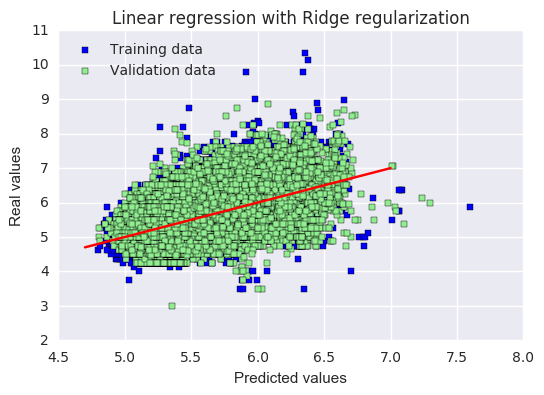

In [72]:
linear_regressor(Hist_numeric_2005_Q1_features.values,Hist_numeric_2005_Q1_target.values,
                 Hist_numeric_2005_Q2_features.values,Hist_numeric_2005_Q2_target.values)

In [63]:
Hist_numeric_2005_Q1_target.values

array([[ 5.625],
       [ 5.75 ],
       [ 6.   ],
       ..., 
       [ 5.25 ],
       [ 4.   ],
       [ 5.625]])

In [38]:
def random_forest(training_feature, traning_label, testing_feature, testing_label):
    regr = RandomForestRegressor(n_estimators=70, min_samples_split=2, max_depth=10)
    regr.fit(training_feature,traning_label)
    # The coefficients
    #print('Coefficients: \n', regr.coef_)
    # Testing the test data and finding the mean squared error
    actual_testing_label = regr.predict(testing_feature)
    actual_traning_label = regr.predict(training_feature)
    # print("Mean squared error:", np.mean(actual_testing_label - testing_label) ** 2)
    MAE=mean_absolute_error(actual_testing_label,testing_label)
    print("MAE:",MAE)
    RMS=math.sqrt(mean_squared_error(actual_testing_label,testing_label))
    print("RMS:",RMS)
    MAPE=mean_absolute_error(actual_testing_label,testing_label)*100
    print("MAPE:",MAPE)
    plt.scatter(actual_traning_label, traning_label, c="blue", marker="s", label="Training data")
    plt.scatter(actual_testing_label, testing_label, c="lightgreen", marker="s", label="Validation data")
    plt.title("Linear regression with Ridge regularization")
    plt.xlabel("Predicted values")
    plt.ylabel("Real values")
    plt.legend(loc="upper left")
    plt.show()

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


MAE: 0.230557020208


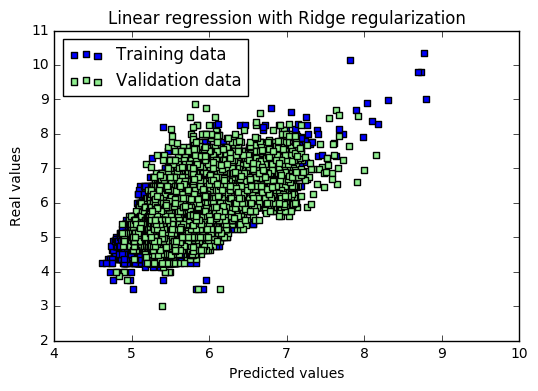

In [39]:
random_forest(Hist_numeric_2005_Q1_features.values,Hist_numeric_2005_Q1_target.values,
              Hist_numeric_2005_Q2_features.values,Hist_numeric_2005_Q2_target.values)

In [ ]:
def Neural_network(training_feature, traning_label, testing_feature, testing_label):
    regr = MLPRegressor(hidden_layer_sizes=(2, ), activation='relu', solver='adam', alpha=0.0001, batch_size='auto',
                        learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True,
                        random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9,
                        nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9,
                        beta_2=0.999, epsilon=1e-08)

    regr.fit(training_feature, traning_label)
    # The coefficients
    # print('Coefficients: \n', regr.coef_)
    # Testing the test data and finding the mean squared error
    actual_testing_label = regr.predict(testing_feature)
    actual_traning_label = regr.predict(training_feature)
    print("Mean squared error:", np.mean(actual_testing_label - testing_label) ** 2)
    plt.scatter(actual_traning_label, traning_label, c="blue", marker="s", label="Training data")
    plt.scatter(actual_testing_label, testing_label, c="lightgreen", marker="s", label="Validation data")
    plt.title("Linear regression with Ridge regularization")
    plt.xlabel("Predicted values")
    plt.ylabel("Real values")
    plt.legend(loc="upper left")
    plt.show()





In [137]:
def statusUpdate(df):
    df['delinquent'] = (df.max_curr_ln_delin_status > 0).astype(int)
    df.drop('max_curr_ln_delin_status', axis = 1,inplace=True)
    df.drop('min_curr_ln_delin_status', axis = 1,inplace=True)
    #df.drop('Year',axis=1,inplace=True) #Duplicate
    #df.drop('Quarter',axis=1,inplace=True) #Duplicate
    return df

In [129]:
#Classification
def dataCleaningOriginal():
    Original_df = pd.read_csv('HistoricalOriginationCombined.csv')
    Original_df=changedatatype(Original_df)
    Original_df=create_dumies(Original_df)
    #Hist_numaric=Original_df
    Original_df.drop('cd_msa',axis=1,inplace=True) 
    Original_df.drop('flag_sc',axis=1,inplace=True) 
    return Original_df

Original_df= dataCleaningOriginal()



In [130]:
def changedatatypePerformance(df):
    #Change the data types for all column
    df[['min_current_aupb','max_current_aupb','min_zero_bal_cd','max_zero_bal_cd','min_mi_recoveries','max_mi_recoveries',
        'min_non_mi_recoveries','max_non_mi_recoveries','min_expenses','max_taxes_and_insur','min_misc_expenses','max_misc_expenses',
        'min_actual_loss_calc','max_actual_loss_calc','min_mod_cost','max_mod_cost','Year']] = \
        df[['min_current_aupb','max_current_aupb','min_zero_bal_cd','max_zero_bal_cd','min_mi_recoveries','max_mi_recoveries',
        'min_non_mi_recoveries','max_non_mi_recoveries','min_expenses','max_taxes_and_insur','min_misc_expenses','max_misc_expenses',
        'min_actual_loss_calc','max_actual_loss_calc','min_mod_cost','max_mod_cost','Year']].astype('int64')
    df[['id_loan','Quarter']] = df[['id_loan','Quarter']].astype('str')
    return df

In [138]:
def dataCleaningPerformance():
        Performance_df = pd.read_csv('HistoricalperformanceCombined.csv')
        changedatatypePerformance(Performance_df)
        Performance_df =statusUpdate(Performance_df)
        
        return Performance_df
    
Performance_df = dataCleaningPerformance()
Performance_df.head()  

,id_loan,min_current_aupb,max_current_aupb,min_zero_bal_cd,max_zero_bal_cd,min_mi_recoveries,max_mi_recoveries,min_non_mi_recoveries,max_non_mi_recoveries,min_expenses,...,max_taxes_and_insur,min_misc_expenses,max_misc_expenses,min_actual_loss_calc,max_actual_loss_calc,min_mod_cost,max_mod_cost,Year,Quarter,delinquent
0,F105Q1000001,0,190000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,2005,Q1,0
1,F105Q1000002,0,90000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,2005,Q1,0
2,F105Q1000003,282963,357000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2005,Q1,0
3,F105Q1000004,0,195000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,2005,Q1,0
4,F105Q1000005,0,253000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,2005,Q1,0


In [139]:
def combineData(f1,f2):
    result = pd.merge(f1,f2,how='inner',on=['id_loan','Year','Quarter'])
    return result

All_data = combineData(Performance_df,Original_df)
#All_data = Performance_df


In [140]:

traning_feature,traning_label,testing_feature,testing_label=dataSplit(All_data,'delinquent')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


In [141]:
 testing_label.size

405640

In [142]:
#def logistic_regressor(traning_feature, traning_label, testing_feature, testing_label):
logreg = linear_model.LogisticRegression()

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(traning_feature, traning_label)
z=logreg.predict(testing_feature)
print(confusion_matrix(testing_label,z))
fpr, tpr, _ = roc_curve(testing_label,z)
print()
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
          label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [105]:
z.size

405640

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[312587   4332]
 [ 55431  33290]]
[ 0.          0.01366911  1.        ]


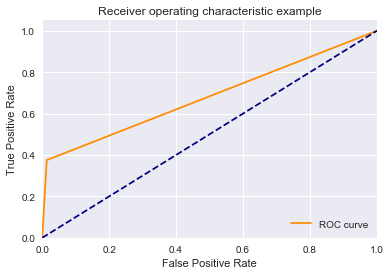

In [113]:
logistic_regressor(traning_feature,traning_label,testing_feature,testing_label)